# library

In [2]:
import os
from math import radians, cos, sin, asin, sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import stdev
from statistics import mean
import matplotlib.pyplot as plt

# Load Data

In [3]:
# load data
taxi_data = pd.read_csv("train_data_135_filtered.csv") 

In [4]:
# basic data cleaning. drop useless columns
taxi_data.loc[taxi_data.Parallel_Distance.isnull(), 'Parallel_Distance'] = taxi_data[taxi_data['Parallel_Distance'].isnull()]['distance_in_km'].values
taxi_data = taxi_data.drop(['date_of_year','date_of_year2','mo','da'], axis=1)

# 2. Exploratory Analysis

## 2.1 Analyze the features and their relationship with travel time 

### 2.1.1 Distribution of Trip Duration

The travel time is normal distributed after log transformation. We could add **log_travel_time** into the dataset.

Text(0,0.5,'number of train records')

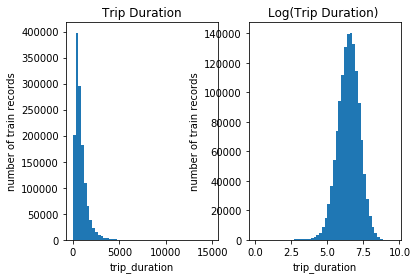

In [6]:
# split the screen into 2 part
fig, [ax1,ax2] = plt.subplots(ncols=2, nrows=1)  
# The distribution of travel time before transformation
ax1.hist(taxi_data['travel_time'],bins=50)
ax1.set_title("Trip Duration")
ax1.set_xlabel('trip_duration')  
ax1.set_ylabel('number of train records')  
# The distribution of travel time after log transformation
ax2.hist(np.log(taxi_data['travel_time'].values+1),bins=50)
ax2.set_title("Log(Trip Duration) ")
ax2.set_xlabel('trip_duration')  
ax2.set_ylabel('number of train records')  

In [8]:
# add log travel time to taxi data set
taxi_data.loc[:,'log_travel_time'] = np.log(taxi_data['travel_time'].values+1)

### 2.1.3 Pickup & Dropoff longtitude and latitude

The distribution of pickup & dropoff longtitude and latitude are normal distributed. This feature must be highly correlated with travel time.

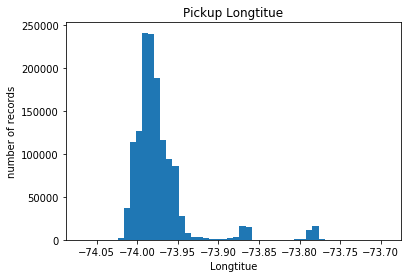

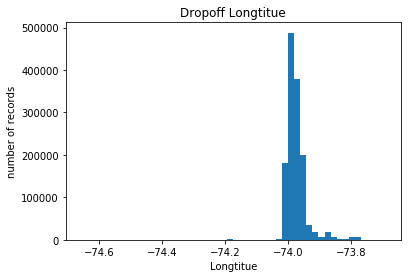

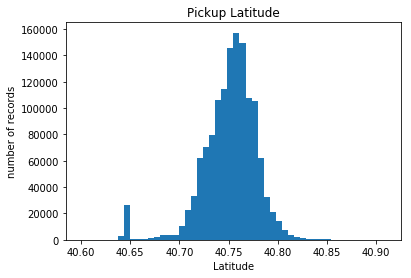

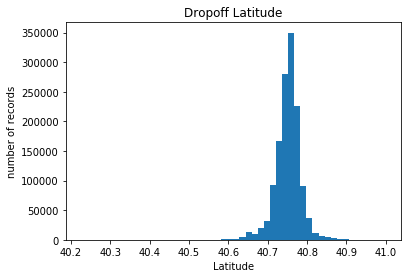

In [9]:
# pickup & drop off longtitude
plt.hist(taxi_data['pickup_longitude'],bins=50)
plt.title("Pickup Longtitue")
plt.xlabel('Longtitue')  
plt.ylabel('number of records')  
plt.show()
plt.hist(taxi_data['dropoff_longitude'],bins=50)
plt.xlabel('Longtitue')  
plt.ylabel('number of records')  
plt.title("Dropoff Longtitue")
plt.show()
# pickup & drop off latitude
plt.hist(taxi_data['pickup_latitude'],bins=50)
plt.xlabel('Latitude')  
plt.ylabel('number of records')  
plt.title("Pickup Latitude")
plt.show()
plt.hist(taxi_data['dropoff_latitude'],bins=50)
plt.xlabel('Latitude')  
plt.ylabel('number of records')  
plt.title("Dropoff Latitude")
plt.show()


### 2.1.3 Distance in km VS Travel Time

Text(0,0.5,'travel time')

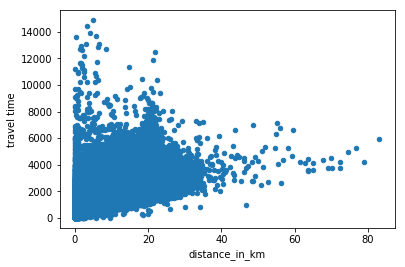

In [10]:
taxi_data.plot(x='distance_in_km',y='travel_time',kind='scatter')
plt.ylabel("travel time")

Some of the trip duration does not match its distance. Short distance but travel over 3 hour.

### 2.1.4 Travel Time and Pickup Time

In [11]:
# Extract Datetime, Month, Day, Weekday and Hour from pickup_datetime
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data.pickup_datetime)  
taxi_data.loc[:,'pickup_month'] =  taxi_data['pickup_datetime'].dt.month
taxi_data.loc[:,'pickup_day'] =  taxi_data['pickup_datetime'].dt.day
taxi_data.loc[:,'pickup_hour'] =  taxi_data['pickup_datetime'].dt.hour
taxi_data.loc[:,'pickup_weekday'] =  taxi_data['pickup_datetime'].dt.weekday+1

#### 2.1.4.1 Trip Durations with Months and Weekdays

Text(0.5,0,'Weekday')

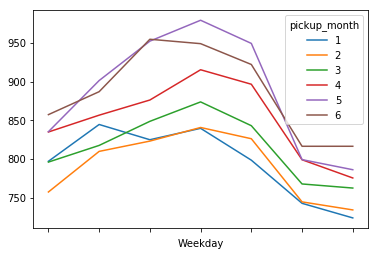

In [12]:
summary_wdays_avg_duration = pd.DataFrame(taxi_data.groupby(['pickup_month','pickup_weekday'])['travel_time'].mean())
summary_wdays_avg_duration = summary_wdays_avg_duration.unstack()
(summary_wdays_avg_duration.T).plot()
plt.xlabel('Weekday')

The travel time is different according to weekdays and month. We should add month and weekday as features in our model.

#### 2.1.4.2 Trip Durations with Hours and Weekdays

Text(0.5,0,'pickup_hour')

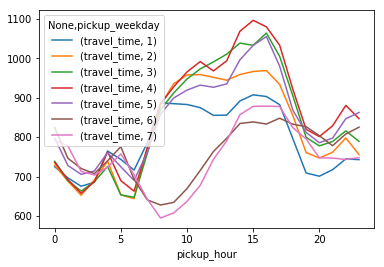

In [13]:
summary_hour_avg_duration = pd.DataFrame(taxi_data.groupby(['pickup_hour','pickup_weekday'])['travel_time'].mean())
summary_hour_avg_duration = summary_hour_avg_duration.unstack()
(summary_hour_avg_duration).plot()
plt.xlabel('pickup_hour')

Weekday and hour does effect the trip duration.

#### 2.1.4.3 Trip Durations with Day

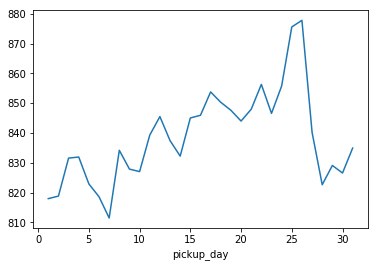

In [14]:
taxi_data.groupby(['pickup_day'])['travel_time'].mean().plot()

Trave date in one month also affect trip duration.

### 2.1.5  Travel Time and Passenger_count

Text(0.5,0,'passenger_count')

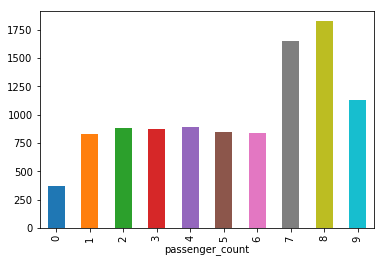

In [15]:
taxi_data.groupby(['passenger_count'])['travel_time'].mean().plot(kind = "bar")
plt.xlabel('passenger_count')

The passenger count seems does not influence trip duration. 

### 2.1.6 Total Number of Pickups 

It is a common sense that the trafic volumn will effect the duration of a trip. In this part, we will exam the total number of pickups as the representative of trafic volumn to see if it will changed by time.

#### 2.1.6.1 Total Number of Pickups by Month

Text(0.5,0,'Month')

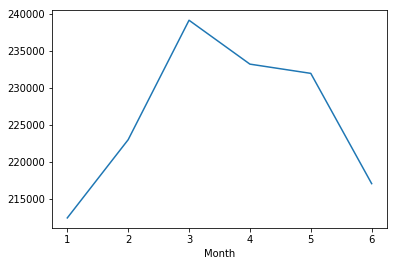

In [16]:
taxi_data.groupby(['pickup_month'])['travel_time'].count().plot()
plt.xlabel('Month')

Month may effect the trafic volumn that people trend to take taxi more during March to April. This maybe beacuse the weather is cold while don't have heavy snow in NYC.

#### 2.1.6.2 Total Number of Pickups by Day

Text(0.5,0,'Day')

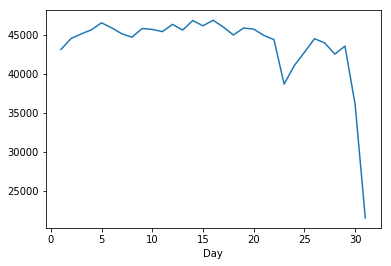

In [17]:
taxi_data.groupby(['pickup_day'])['travel_time'].count().plot()
plt.xlabel('Day')

The numbers of pickup seems to be same in the same day of a month. 

#### 2.1.6.3 Total Number of Pickups by Weekday

Text(0.5,0,'Weekday')

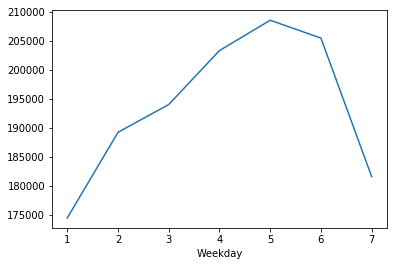

In [18]:
taxi_data.groupby(['pickup_weekday'])['travel_time'].count().plot()
plt.xlabel('Weekday')

It seems people tend to take more taxi at the end of a week.

#### 2.1.6.4 Total Number of Pickups by Hour

Text(0.5,0,'Hour')

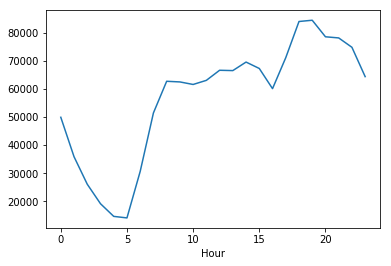

In [19]:
taxi_data.groupby(['pickup_hour'])['travel_time'].count().plot()
plt.xlabel('Hour')

Hours influence the trafic volumn and we should take this feature into consideration.

#### 2.1.6.5 Total Number of Pickups by Passenger_count

Text(0.5,0,'passenger_count')

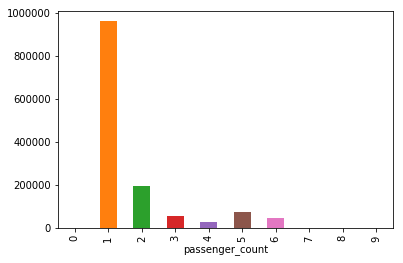

In [20]:
taxi_data.groupby(['passenger_count'])['travel_time'].count().plot(kind = "bar")
plt.xlabel('passenger_count')

In [22]:
taxi_data.groupby(['passenger_count'])['travel_time'].count()

passenger_count
0        37
1    961934
2    195388
3     55581
4     26529
5     72411
6     44812
7         2
8         5
9         2
Name: travel_time, dtype: int64

Most of people take taxi by themself. We may need futher analysis to see if this affect the travle time.
本来8.9数量就非常小，才几百个，很有可能不在我们数据集里面，0都有1万多条记录

## 2.2 Correlations and chi-squared

### 2.2.1 Correlation matirx between continuous variables

In [25]:
taxi_data.columns.values.tolist()

['pickup_datetime',
 'travel_time',
 'trip_distance',
 'pickup_latitude',
 'pickup_longitude',
 'dropoff_latitude',
 'dropoff_longitude',
 'passenger_count',
 'distance_in_km',
 'Parallel_Distance',
 'drop_PEN_DISTANCE',
 'drop_LAG_DISTANCE',
 'drop_JFK_DISTANCE',
 'drop_CSMK_DISTANCE',
 'drop_MMOA_DISTANCE',
 'pick_PEN_DISTANCE',
 'pick_LAG_DISTANCE',
 'pick_JFK_DISTANCE',
 'pick_CSMK_DISTANCE',
 'pick_MMOA_DISTANCE',
 'speed',
 'temp',
 'visib',
 'wdsp',
 'gust',
 'max',
 'min',
 'prcp',
 'sndp',
 'fog',
 'rain_drizzle',
 'snow_ice_pellets',
 'hail',
 'thunder',
 'common_holiday',
 'key_holiday',
 'logrtn',
 'log_travel_time',
 'pickup_month',
 'pickup_day',
 'pickup_hour',
 'pickup_weekday']

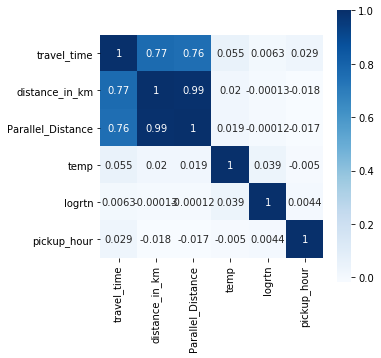

In [33]:
continus_var = taxi_data[["travel_time","distance_in_km","Parallel_Distance"
                          ,"temp","logrtn","pickup_hour"]]
import seaborn as sns
import matplotlib.pyplot as plt
# Corrlation plot
corr_continus = continus_var.corr()
plt.subplots(figsize=(5, 5)) 
sns.heatmap(corr_continus, annot=True, vmax=1, square=True, cmap="Blues")
plt.show()

### 2.2.2 Chi-squre between categorical variables

In [39]:
import researchpy as rp

In [35]:
category_var=taxi_data[['common_holiday','key_holiday','passenger_count']]

#### 2.2.2.1 common_holiday with passenger_count

In [40]:
table, results = rp.crosstab(category_var['common_holiday'], category_var['passenger_count'], prop= 'col', test= 'chi-square')
    
table

passenger_count                                                 \
                             0       1      2       3       4       5       6   
common_holiday                                                                  
0                         97.3   91.68   91.4   91.27   90.71   91.44   91.82   
1                          2.7    8.32    8.6    8.73    9.29    8.56    8.18   
All                      100.0  100.00  100.0  100.00  100.00  100.00  100.00   

                                            
                    7      8      9    All  
common_holiday                              
0               100.0  100.0  100.0   91.6  
1                 0.0    0.0    0.0    8.4  
All             100.0  100.0  100.0  100.0

In [41]:
results

,Chi-square test,results
0,Pearson Chi-square ( 9.0) =,61.1279
1,p-value =,0.0000
2,Cramer's V =,0.0067


#### 2.2.2.2 key_holiday with passenger_count

In [43]:
table, results = rp.crosstab(category_var['key_holiday'], category_var['passenger_count'], prop= 'col', test= 'chi-square')
    
table

passenger_count                                                 \
                          0       1       2       3       4      5       6   
key_holiday                                                                  
0                     94.59   97.56   97.14   97.07   96.77   97.4   97.36   
1                      5.41    2.44    2.86    2.93    3.23    2.6    2.64   
All                  100.00  100.00  100.00  100.00  100.00  100.0  100.00   

                                          
                 7      8      9     All  
key_holiday                               
0            100.0  100.0  100.0   97.45  
1              0.0    0.0    0.0    2.55  
All          100.0  100.0  100.0  100.00

In [45]:
results

,Chi-square test,results
0,Pearson Chi-square ( 9.0) =,208.9935
1,p-value =,0.0000
2,Cramer's V =,0.0124
